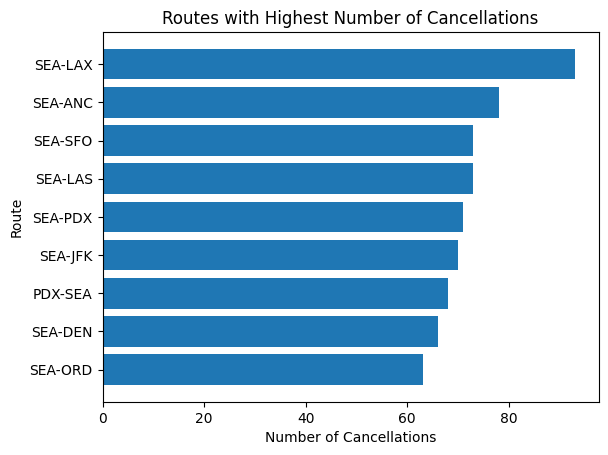

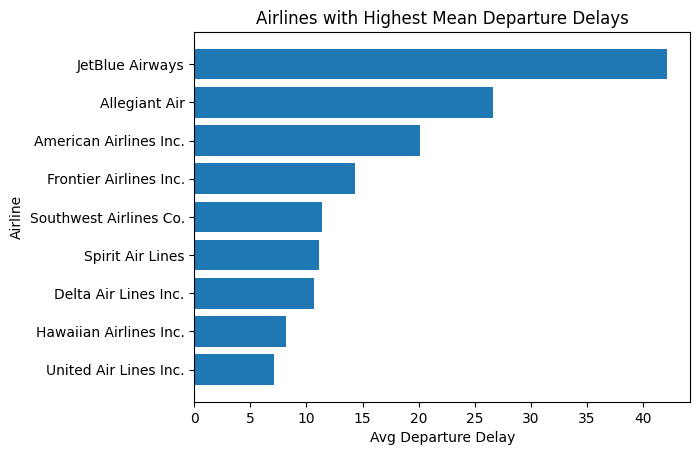

windy      False     True 
origin                    
PDX     6.686966  9.147024
SEA     7.857595  9.231060
wind_response True


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv('CSV_files/flights2022.csv')
weather = pd.read_csv('CSV_files/flights_weather2022.csv')

#print(flights.info())
#print(weather.info())

# Create the route column

flights['route'] = flights['origin'] + '-' + flights['dest']
flights['cancelled'] = flights['dep_time'].isna().astype(int)


# Calculate average departure delays & number of cancellations for routes

routes_delays_cancels = (flights.groupby('route')
                        .agg(avg_dep_delay=('dep_delay', 'mean'),
                             cancelled_count=('cancelled', 'sum'))
                         ).reset_index()

# Top 9 delays for routes
top_routes_by_delay = routes_delays_cancels.sort_values('avg_dep_delay', ascending=False).head(9)

# Top 9 cancellations for routes
top_routes_by_cancellations = routes_delays_cancels.sort_values('cancelled_count', ascending=False).head(9)




# Calculate average departure delays & number of cancellations for airlines

airlines_delays_cancels = (flights.groupby('airline')
                         .agg(avg_dep_delay=('dep_delay', 'mean'),
                             cancelled_count=('cancelled', 'sum'))
                         ).reset_index()

# Top 9 delays for airlines
top_airlines_by_delay = airlines_delays_cancels.sort_values('avg_dep_delay', ascending=False).head(9)

# Top 9 cancellations for airlines
top_airlines_by_cancellations = airlines_delays_cancels.sort_values('cancelled_count', ascending=False).head(9)



# Highest number of cancellations chart
top9_route_cancels_bar, ax = plt.subplots()
ax.barh(top_routes_by_cancellations["route"], top_routes_by_cancellations["cancelled_count"])
ax.invert_yaxis()
ax.set_xlabel("Number of Cancellations")
ax.set_ylabel("Route")
ax.set_title("Routes with Highest Number of Cancellations")
plt.show()

# Highest average departure delay chart
top9_airline_delays_bar, ax = plt.subplots()
ax.barh(top_airlines_by_delay["airline"], top_airlines_by_delay["avg_dep_delay"])
ax.invert_yaxis()
ax.set_xlabel("Avg Departure Delay")
ax.set_ylabel("Airline")
ax.set_title("Airlines with Highest Mean Departure Delays")
plt.show()


# Determining the effect of wind gust on departure delays

weather['windy'] = weather['wind_gust'] >= 10

avg_delay_by_wind = (
    weather.groupby(['origin', 'windy'], as_index=False)['dep_delay']
    .mean()
    .rename(columns={'dep_delay': 'avg_dep_delay'})
)

#print(avg_delay_by_wind)

pivot = avg_delay_by_wind.pivot(index='origin', columns='windy', values='avg_dep_delay')
print(pivot)

wind_response = all(pivot[True] > pivot[False])
print("wind_response", wind_response)